In [1]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.stats import spearmanr, pearsonr
warnings.filterwarnings('ignore')

In [2]:
df, meta = pyreadstat.read_sav('data.sav')

In [3]:
print(df.shape)
df.head()

(770, 76)


,ID,Query_Immunolg_M_W_E.ID,Immunsupp,Immunsupp_Kommi,Grad_Immunsupp,Query_Immunolg_M_W_E.Immunsuppression0nein1ja,Group,NC0422,S08,Nursing_Home,...,dat_vis_labor_quja,letztes_event_kat,log_S08_V2,log_NC0422_V2,PAT_ID_E1,diabetes_flag,neph_akut_diag,neph_chorn_kh_diag,neph_insuff_diag,Krank_JaNein
0,M017007,M017007,NaN,,NaN,NaN,K1,0.078703,NaN,0.0,...,2021-10-01,3.0,NaN,NaN,E-001-002,0.0,0.0,1.0,0.0,1.0
1,M004001,M004001,NaN,,NaN,NaN,K1,0.081168,58.690958,0.0,...,2021-10-01,2.0,3.126001,-1.155671,E-001-003,1.0,0.0,1.0,0.0,2.0
2,M005003,M005003,NaN,,NaN,NaN,K1,0.118979,5.234605,1.0,...,2021-04-01,2.0,NaN,NaN,E-002-001,0.0,0.0,0.0,0.0,0.0
3,M004005,M004005,NaN,,NaN,NaN,K1,0.099916,2247.323645,0.0,...,2021-10-01,2.0,NaN,NaN,E-002-002,0.0,0.0,0.0,0.0,0.0
4,M007003,M007003,NaN,,NaN,NaN,K1,0.085073,36.383344,0.0,...,2021-04-01,2.0,NaN,NaN,E-002-004,0.0,0.0,0.0,0.0,0.0


In [4]:
for col in meta.column_names:
    print(col)


ID
Query_Immunolg_M_W_E.ID
Immunsupp
Immunsupp_Kommi
Grad_Immunsupp
Query_Immunolg_M_W_E.Immunsuppression0nein1ja
Group
NC0422
S08
Nursing_Home
Visit
SEX
AGE
BMI
MOCA
BARTHELINDEX
vac_1_g
vac_2_g
vac_3_g
vac_4_g
vac_5_g
inf_1_g
inf_2_g
inf_3_g
inf_4_g
dat_labor
diff_labor_visit_v1
dat_vis_labor
diff_vis1_vac1
diff_vis1_vac2
diff_vis1_vac3
diff_vis1_vac4
diff_vis1_vac5
diff_vis1_inf1
diff_vis1_inf2
diff_vis1_inf3
diff_vis1_inf4
diff_vis_inf
diff_vis_inf_kat
nc0422_log
s08_log
PrimaryLast
PrimaryLast1
PrimaryFirst_3_sum
N_BREAK
S08_pn
NC0422_pn
filter_$
diff_vac1_inf1
diff_vac2_inf1
diff_vac3_inf1
diff_vac4_inf1
diff_vac5_inf1
imf_v_n_infection
anzahl_Imp_baseline
impf_vor_einsch
diff_letzte_impf_vis
diff_letzte_inf_vis
impf_vor_einsch_kat
diff_letzte_imp_vis_kat
diff_letzte_inf_vis_kat
anzahl_Inf_baseline
dat_inf_vor_v1
inf_vor_einsch
dat_vis_labor_quart
dat_vis_labor_jahr
dat_vis_labor_quja
letztes_event_kat
log_S08_V2
log_NC0422_V2
PAT_ID_E1
diabetes_flag
neph_akut_diag
neph_chorn_kh_

In [5]:
# 2 and 3 -> 1
print(df["Krank_JaNein"].value_counts())
df["krank_binary"] = df["Krank_JaNein"].replace({2: 1, 3: 1})
print(df["krank_binary"].value_counts())

Krank_JaNein
0.0    520
1.0    176
2.0     66
3.0      8
Name: count, dtype: int64
krank_binary
0.0    520
1.0    250
Name: count, dtype: int64


In [6]:
print(df["Query_Immunolg_M_W_E.Immunsuppression0nein1ja"].value_counts())

df["Immunsuppression_binary_clean"] = df["Query_Immunolg_M_W_E.Immunsuppression0nein1ja"].replace({np.nan: 0})
df["Immunsuppression_binary_clean"].value_counts()

Query_Immunolg_M_W_E.Immunsuppression0nein1ja
0.0    117
1.0     16
Name: count, dtype: int64


Immunsuppression_binary_clean
0.0    754
1.0     16
Name: count, dtype: int64

## S08


       Mean: 1225.26,
       Median: 1177.0,
       Std Dev: 729.87,
       Range: 3615.98,
       IQR: 1121.42



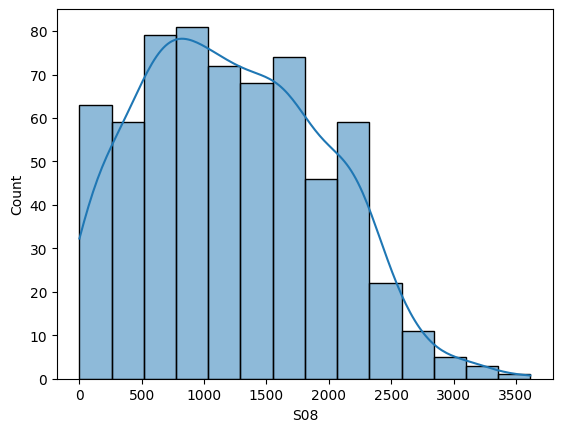

In [7]:
sns.histplot(df['S08'].dropna(), kde=True)
mean=df['S08'].mean()
median=df['S08'].median()
std=df['S08'].std()
print(f"""
       Mean: {round(mean, 2)},
       Median: {round(median, 2)},
       Std Dev: {round(std, 2)},
       Range: {round(df['S08'].max() - df['S08'].min(), 2)},
       IQR: {round(df['S08'].quantile(0.75) - df['S08'].quantile(0.25), 2)}
""")

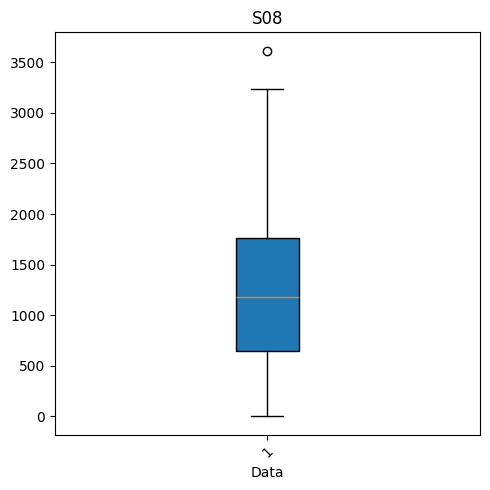

In [8]:
# Set the figure size
plt.figure(figsize=(5, 5))

# Create a box plot for "S08"
plt.boxplot(df["S08"].dropna(), vert=True, patch_artist=True)

# Set the title and labels
plt.title('S08')
plt.xlabel('Data')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure proper layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
IQR = df['S08'].quantile(0.75) - df['S08'].quantile(0.25)
Q1 = df['S08'].quantile(0.25)
Q3 = df['S08'].quantile(0.75)

outliers = df[(df["S08"] < Q1 - 1.5 * IQR) | (df["S08"] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in S08: {outliers.shape[0]}")

# Remove outliers but keep NaN values
outlier_mask = (df["S08"] < Q1 - 1.5 * IQR) | (df["S08"] > Q3 + 1.5 * IQR)
df = df[~outlier_mask]

Number of outliers in S08: 1


## Date

Date Analysis for dat_labor:
Date range: 2021-03-10 00:00:00 to 2023-10-27 00:00:00
Number of valid dates: 648


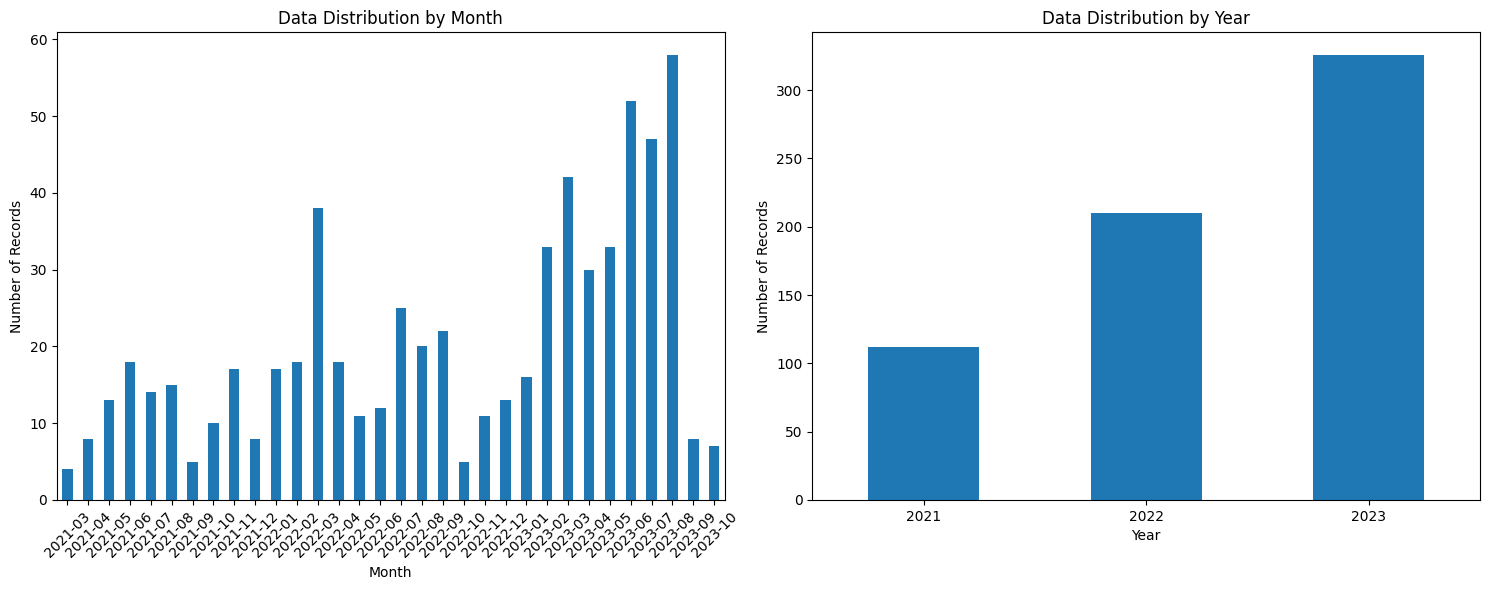

In [10]:
# Simple date visualization - just histogram by month and bar plot by year
date_column = 'dat_labor'  # Replace with actual column name

if date_column in df.columns:
    # Ensure the column is datetime
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Remove any NaT (Not a Time) values for analysis
    date_data = df[date_column].dropna()
    
    print(f"Date Analysis for {date_column}:")
    print(f"Date range: {date_data.min()} to {date_data.max()}")
    print(f"Number of valid dates: {len(date_data)}")
    
    # Create 2 plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Distribution by month
    date_data.dt.to_period('M').value_counts().sort_index().plot(kind='bar', ax=axes[0])
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Number of Records')
    axes[0].set_title('Data Distribution by Month')
    axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Distribution by year
    date_data.dt.year.value_counts().sort_index().plot(kind='bar', ax=axes[1])
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number of Records')
    axes[1].set_title('Data Distribution by Year')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"Column '{date_column}' not found. Please check the column name.")

In [11]:
df['year'] = df['dat_labor'].dt.year#.astype('Int64')
print(df.year.value_counts())
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
for y in [2021, 2022, 2023]:
    df[str(y)] = df['year'] == y
print(df.year.value_counts())

year
2023.0    326
2022.0    210
2021.0    112
Name: count, dtype: int64
year
2023    326
2022    210
2021    112
Name: count, dtype: int64


## Age


       Mean: 77.56,
       Median: 81.0,
       Std Dev: 12.21,
       Range: 71.0,
       IQR: 15.0



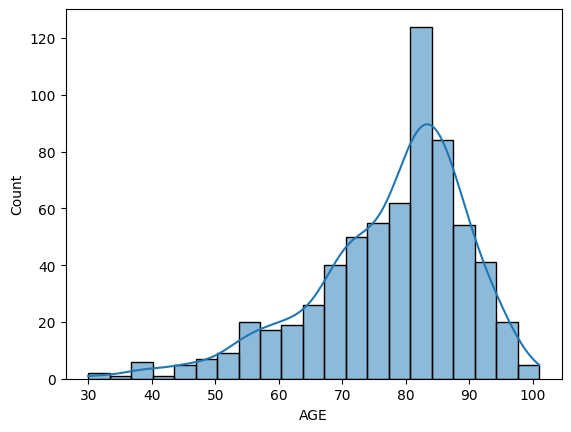

In [12]:
sns.histplot(df['AGE'].dropna(), kde=True)
mean=df['AGE'].mean()
median=df['AGE'].median()
std=df['AGE'].std()
print(f"""
       Mean: {round(mean, 2)},
       Median: {round(median, 2)},
       Std Dev: {round(std, 2)},
       Range: {round(df['AGE'].max() - df['AGE'].min(), 2)},
       IQR: {round(df['AGE'].quantile(0.75) - df['AGE'].quantile(0.25), 2)}
""")

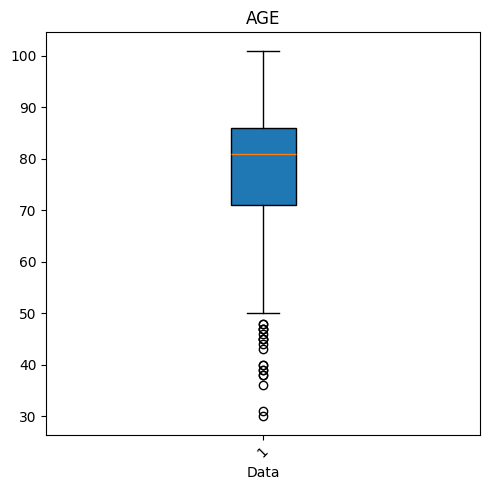

In [13]:
# Set the figure size
plt.figure(figsize=(5, 5))

# Create a box plot for "AGE"
plt.boxplot(df["AGE"].dropna(), vert=True, patch_artist=True)

# Set the title and labels
plt.title('AGE')
plt.xlabel('Data')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure proper layout and display the plot
plt.tight_layout()
plt.show()

In [14]:
df = df[df["AGE"] >= 50]

## Sex

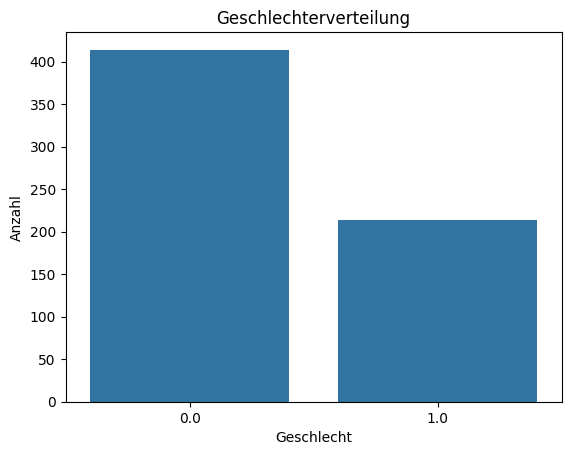

In [15]:
sns.countplot(x='SEX', data=df)
plt.title('Geschlechterverteilung')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.show()

0: Frauen, 1: Männer

## BMI


       Mean: 26.44,
       Median: 25.77,
       Std Dev: 5.31,
       Range: 44.97,
       IQR: 6.5



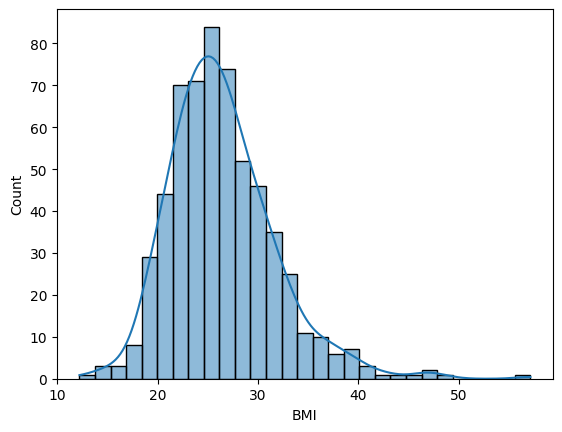

In [16]:
# bmi histogram
sns.histplot(df['BMI'].dropna(), kde=True)
mean=df['BMI'].mean()
median=df['BMI'].median()
std=df['BMI'].std()
print(f"""
       Mean: {round(mean, 2)},
       Median: {round(median, 2)},
       Std Dev: {round(std, 2)},
       Range: {round(df['BMI'].max() - df['BMI'].min(), 2)},
       IQR: {round(df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25), 2)}
""")

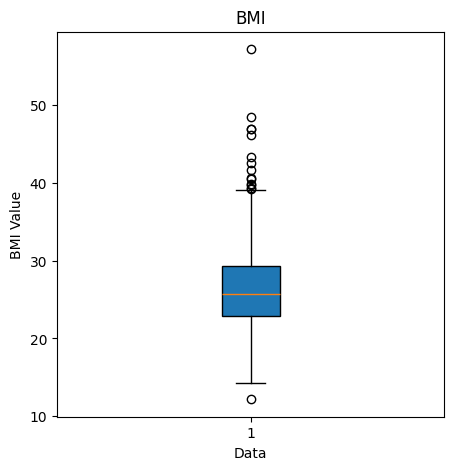

In [17]:
# bmi boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(df["BMI"].dropna(), vert=True, patch_artist=True)
plt.title('BMI')
plt.xlabel('Data')
plt.ylabel('BMI Value')
plt.show()

## MOCA


       Mean: 18.13,
       Median: 19.0,
       Std Dev: 3.88,
       Range: 23.0,
       IQR: 5.0



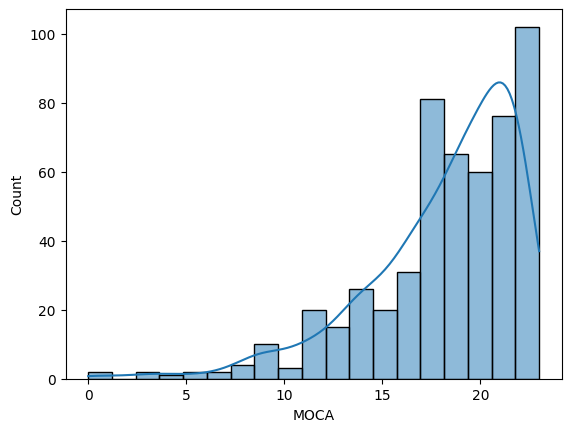

In [18]:
# histogram moca
sns.histplot(df['MOCA'].dropna(), kde=True)
mean=df['MOCA'].mean()
median=df['MOCA'].median()
std=df['MOCA'].std()
print(f"""
       Mean: {round(mean, 2)},
       Median: {round(median, 2)},
       Std Dev: {round(std, 2)},
       Range: {round(df['MOCA'].max() - df['MOCA'].min(), 2)},
       IQR: {round(df['MOCA'].quantile(0.75) - df['MOCA'].quantile(0.25), 2)}
""")

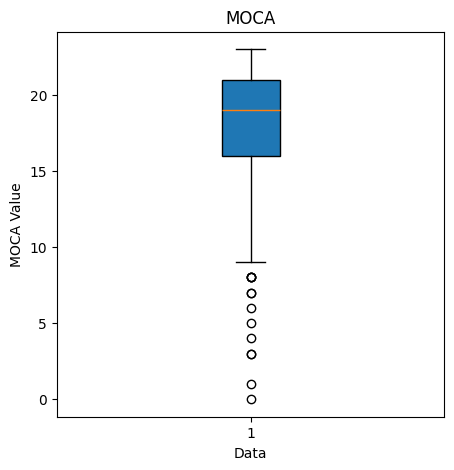

In [19]:
# MOCA boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(df["MOCA"].dropna(), vert=True, patch_artist=True)
plt.title('MOCA')
plt.xlabel('Data')
plt.ylabel('MOCA Value')
plt.show()  

## Barthelindex


       Mean: 80.08,
       Median: 90.0,               
       Std Dev: 24.62,
       Range: 160.0,
       IQR: 30.0



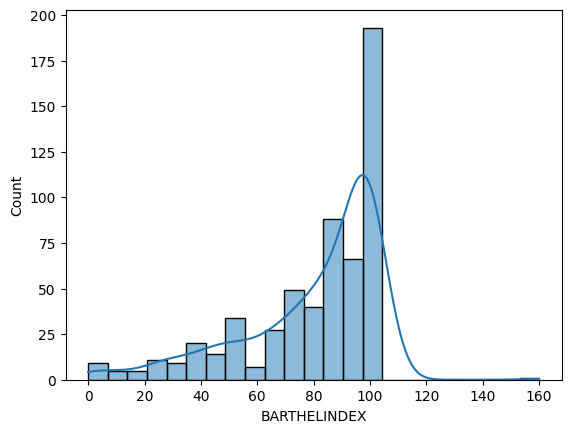

In [20]:
# histogram barthelindex
sns.histplot(df['BARTHELINDEX'].dropna(), kde=True)
mean=df['BARTHELINDEX'].mean()
median=df['BARTHELINDEX'].median()
std=df['BARTHELINDEX'].std()
print(f"""
       Mean: {round(mean, 2)},
       Median: {round(median, 2)},               
       Std Dev: {round(std, 2)},
       Range: {round(df['BARTHELINDEX'].max() - df['BARTHELINDEX'].min(), 2)},
       IQR: {round(df['BARTHELINDEX'].quantile(0.75) - df['BARTHELINDEX'].quantile(0.25), 2)}
""")

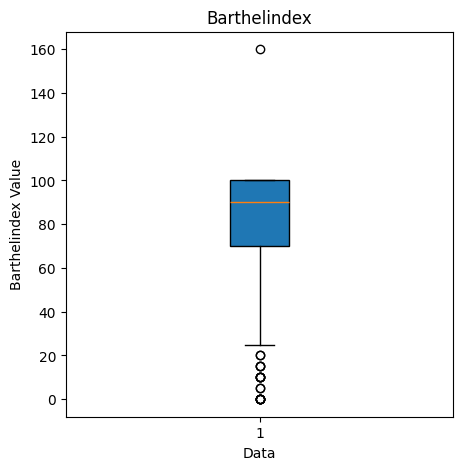

In [21]:
# barthelindex boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(df["BARTHELINDEX"].dropna(), vert=True, patch_artist=True)
plt.title('Barthelindex')
plt.xlabel('Data')
plt.ylabel('Barthelindex Value')
plt.show()

Outlier: 160 rauskicken, alles >100 raus

In [22]:
df = df[df["BARTHELINDEX"] <= 100]

## Anzahl Imp Baseline

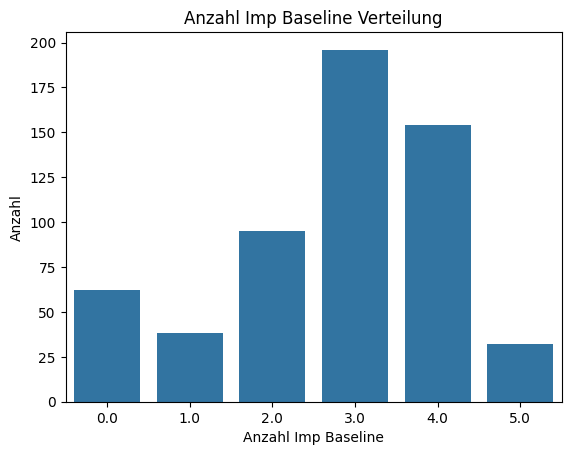

In [23]:
# barplot anzahl_Imp_baseline
sns.countplot(x='anzahl_Imp_baseline', data=df)
plt.title('Anzahl Imp Baseline Verteilung')
plt.xlabel('Anzahl Imp Baseline')
plt.ylabel('Anzahl')
plt.show()

## Anzahl Inf Baseline

In [24]:
df.anzahl_Inf_baseline

0      NaN
1      NaN
3      NaN
4      NaN
5      NaN
      ... 
644    1.0
645    1.0
646    NaN
647    1.0
648    2.0
Name: anzahl_Inf_baseline, Length: 577, dtype: float64

In [25]:
print(df["anzahl_Inf_baseline"].value_counts())

df["anzahl_Inf_baseline"] = df["anzahl_Inf_baseline"].replace({np.nan: 0})
df["anzahl_Inf_baseline"].value_counts()

df["anzahl_Inf_baseline"] = df["anzahl_Inf_baseline"].replace({2: 1, 3: 1, 4: 1})
print(df["anzahl_Inf_baseline"].value_counts())

anzahl_Inf_baseline
1.0    405
2.0     36
4.0      1
3.0      1
Name: count, dtype: int64
anzahl_Inf_baseline
1.0    443
0.0    134
Name: count, dtype: int64


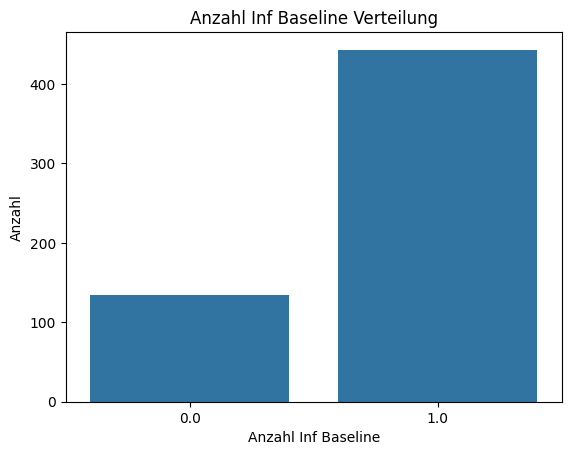

In [26]:
# anzahl_inf_baseline barplot
sns.countplot(x='anzahl_Inf_baseline', data=df)
plt.title('Anzahl Inf Baseline Verteilung')
plt.xlabel('Anzahl Inf Baseline')
plt.ylabel('Anzahl')
plt.show()

NaN zu 0 kovertieren, dichotomisieren: 0, >0

## Nursing Home

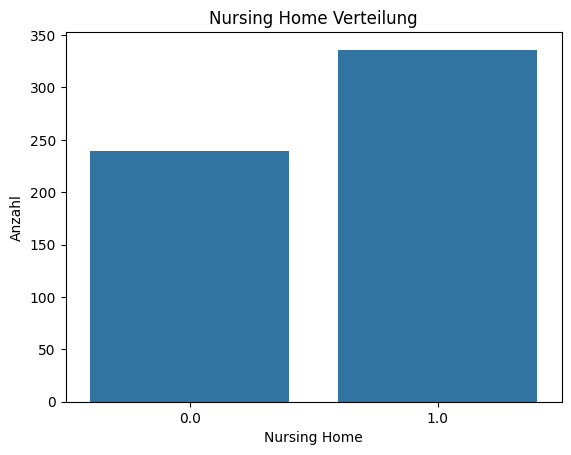

In [27]:
# Nursing_Home barplot
sns.countplot(x='Nursing_Home', data=df)
plt.title('Nursing Home Verteilung')
plt.xlabel('Nursing Home')
plt.ylabel('Anzahl')
plt.show()

## Immunsuppression binär

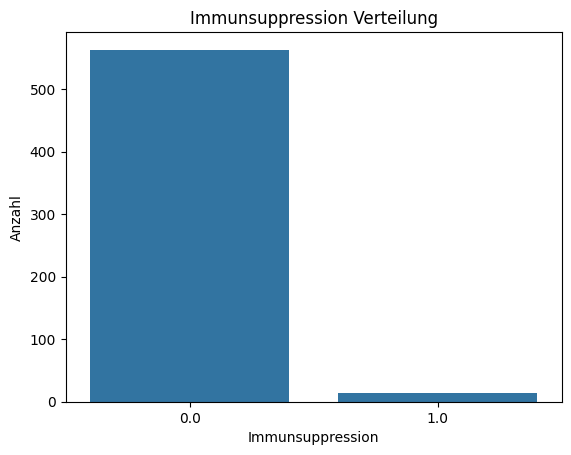

In [28]:
# Immunsuppression_binary_clean barplot
sns.countplot(x='Immunsuppression_binary_clean', data=df)
plt.title('Immunsuppression Verteilung')
plt.xlabel('Immunsuppression')
plt.ylabel('Anzahl')
plt.show()

## Krank binär

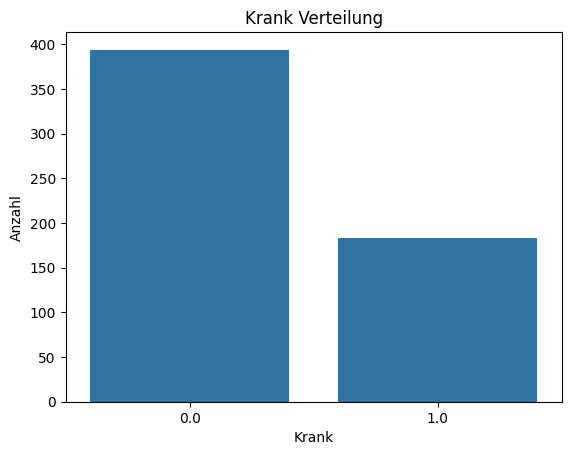

In [29]:
# krank_binary barplot
sns.countplot(x='krank_binary', data=df)
plt.title('Krank Verteilung')
plt.xlabel('Krank')
plt.ylabel('Anzahl')
plt.show()

## Correlation Matrix

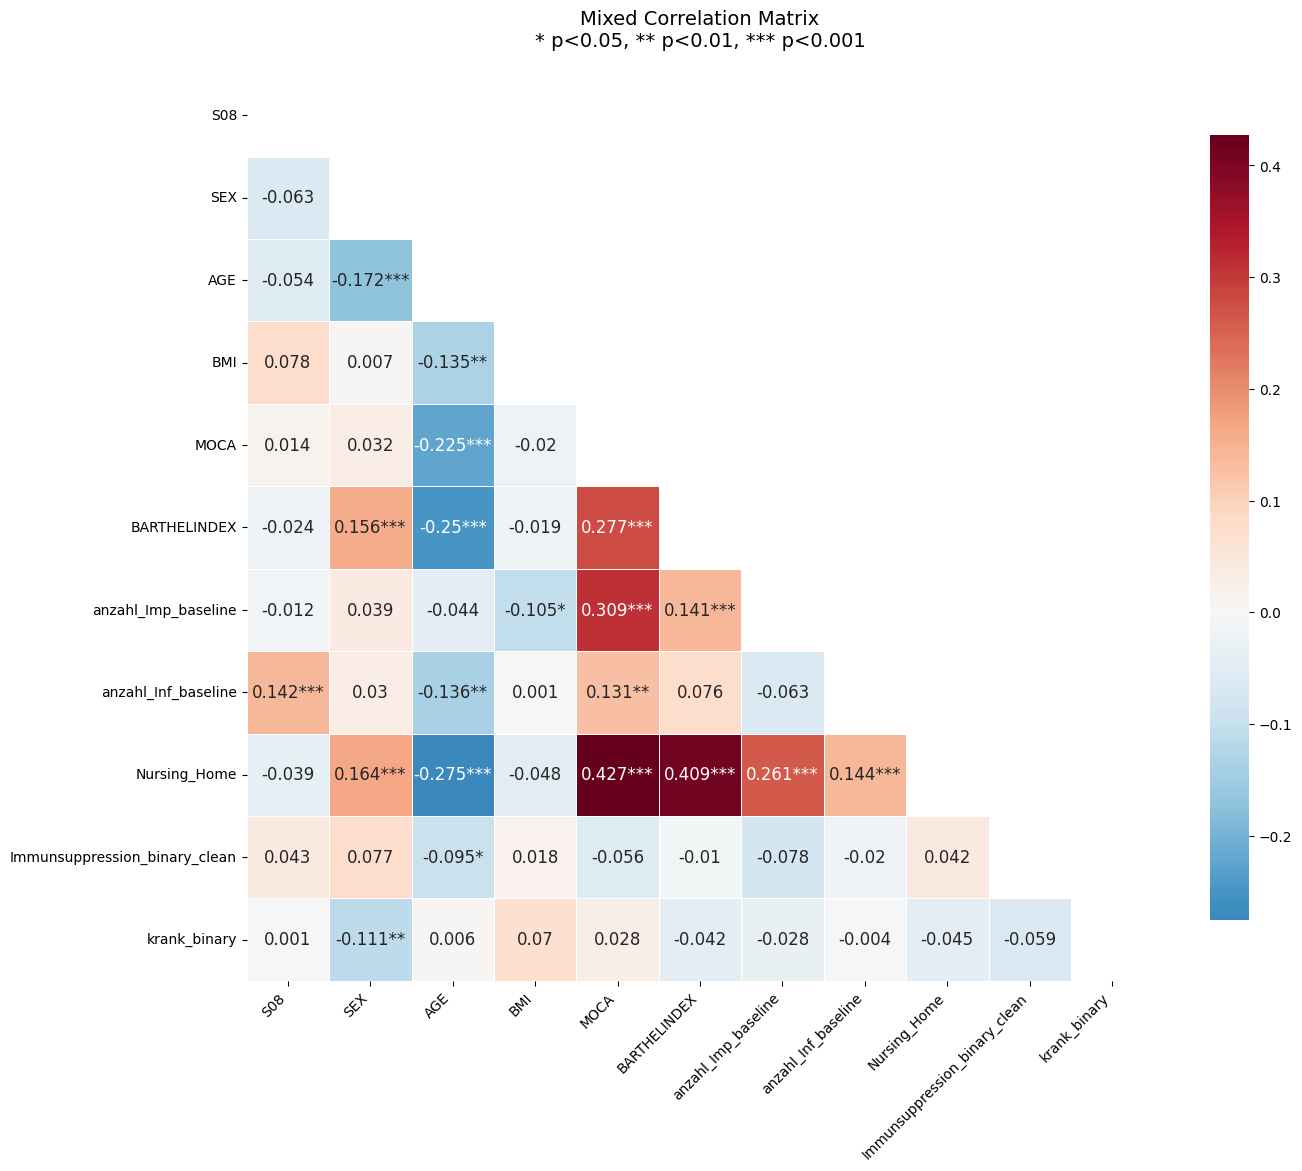


Mixed Correlation Analysis Results:
P = Pearson (continuous variables)
S = Spearman (categorical/ordinal variables)
SEX vs S08: Spearman r = -0.063, p = 0.130
AGE vs S08: Pearson r = -0.054, p = 0.199
AGE vs SEX: Spearman r = -0.172, p = 0.000 (***)
BMI vs S08: Pearson r = 0.078, p = 0.067
BMI vs SEX: Spearman r = 0.007, p = 0.864
BMI vs AGE: Pearson r = -0.135, p = 0.001 (**)
MOCA vs S08: Pearson r = 0.014, p = 0.757
MOCA vs SEX: Spearman r = 0.032, p = 0.477
MOCA vs AGE: Pearson r = -0.225, p = 0.000 (***)
MOCA vs BMI: Pearson r = -0.020, p = 0.654
BARTHELINDEX vs S08: Pearson r = -0.024, p = 0.573
BARTHELINDEX vs SEX: Spearman r = 0.156, p = 0.000 (***)
BARTHELINDEX vs AGE: Pearson r = -0.250, p = 0.000 (***)
BARTHELINDEX vs BMI: Pearson r = -0.019, p = 0.650
BARTHELINDEX vs MOCA: Pearson r = 0.277, p = 0.000 (***)
anzahl_Imp_baseline vs S08: Spearman r = -0.012, p = 0.777
anzahl_Imp_baseline vs SEX: Spearman r = 0.039, p = 0.349
anzahl_Imp_baseline vs AGE: Spearman r = -0.044, p =

In [30]:
correlation_columns = [
    'S08', 'SEX', 'AGE', 'BMI', 'MOCA', 'BARTHELINDEX', 
    'anzahl_Imp_baseline', 'anzahl_Inf_baseline', 'Nursing_Home',
    'Immunsuppression_binary_clean', 'krank_binary'
]

# Define which variables are categorical/ordinal (use Spearman)
categorical_vars = ['anzahl_Imp_baseline', 'anzahl_Inf_baseline', 'SEX', 'Nursing_Home', 
                   'Immunsuppression_binary_clean', 'krank_binary']

# Get existing columns (include all types, not just numeric)
existing_columns = [col for col in correlation_columns if col in df.columns]
corr_data = df[existing_columns].copy()

# Convert categorical to numeric if needed
for col in corr_data.columns:
    if corr_data[col].dtype == 'object':
        corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')

if len(corr_data.columns) > 1:
    # Calculate correlation matrix and p-values
    n_vars = len(corr_data.columns)
    corr_matrix = np.zeros((n_vars, n_vars))
    p_matrix = np.zeros((n_vars, n_vars))
    method_matrix = np.full((n_vars, n_vars), '', dtype=object)
    
    for i in range(n_vars):
        for j in range(n_vars):
            col1 = corr_data.columns[i]
            col2 = corr_data.columns[j]
            
            if i == j:
                corr_matrix[i, j] = 1.0
                p_matrix[i, j] = 0.0
                method_matrix[i, j] = 'diag'
            else:
                # Remove NaN values for each pair
                x = corr_data.iloc[:, i].dropna()
                y = corr_data.iloc[:, j].dropna()
                
                # Find common indices (both variables have values)
                common_idx = x.index.intersection(y.index)
                if len(common_idx) > 2:  # Need at least 3 observations
                    # Choose method based on variable types
                    if col1 in categorical_vars or col2 in categorical_vars:
                        # Use Spearman for categorical/ordinal variables
                        corr, p_val = spearmanr(x[common_idx], y[common_idx])
                        method_matrix[i, j] = 'S'
                    else:
                        # Use Pearson for continuous variables
                        corr, p_val = pearsonr(x[common_idx], y[common_idx])
                        method_matrix[i, j] = 'P'
                    
                    corr_matrix[i, j] = corr
                    p_matrix[i, j] = p_val
                else:
                    corr_matrix[i, j] = np.nan
                    p_matrix[i, j] = np.nan
                    method_matrix[i, j] = 'NA'
    
    # Convert to DataFrames
    corr_df = pd.DataFrame(corr_matrix, index=corr_data.columns, columns=corr_data.columns)
    p_df = pd.DataFrame(p_matrix, index=corr_data.columns, columns=corr_data.columns)
    method_df = pd.DataFrame(method_matrix, index=corr_data.columns, columns=corr_data.columns)
    
    # Create significance mask (p < 0.05)
    sig_mask = p_df < 0.05
    
    # Plot correlation matrix with significance asterisks and method indicators
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    
    # Create annotations with significance markers only
    annot_matrix = corr_df.round(3).astype(str)
    for i in range(len(corr_df.columns)):
        for j in range(len(corr_df.columns)):
            if not mask[i, j]:  # Only for lower triangle
                p_val = p_df.iloc[i, j]
                
                # Add significance markers only
                if p_val < 0.001:
                    annot_matrix.iloc[i, j] += '***'
                elif p_val < 0.01:
                    annot_matrix.iloc[i, j] += '**'
                elif p_val < 0.05:
                    annot_matrix.iloc[i, j] += '*'
    
    sns.heatmap(corr_df, 
               annot=annot_matrix,
               fmt='',
               cmap='RdBu_r',
               center=0,
               square=True,
               mask=mask,
               linewidths=0.5,
               cbar_kws={"shrink": .8},
               annot_kws={'size': 12})
    
    plt.title('Mixed Correlation Matrix\n* p<0.05, ** p<0.01, *** p<0.001', 
              fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\nMixed Correlation Analysis Results:")
    print("="*60)
    print("P = Pearson (continuous variables)")
    print("S = Spearman (categorical/ordinal variables)")
    print("="*60)
    
    for i, col1 in enumerate(corr_df.columns):
        for j, col2 in enumerate(corr_df.columns):
            if i > j:  # Only lower triangle
                corr_val = corr_df.iloc[i, j]
                p_val = p_df.iloc[i, j]
                method = method_df.iloc[i, j]
                
                sig_level = ""
                if p_val < 0.001:
                    sig_level = " (***)"
                elif p_val < 0.01:
                    sig_level = " (**)"
                elif p_val < 0.05:
                    sig_level = " (*)"
                
                method_name = "Pearson" if method == 'P' else "Spearman" if method == 'S' else "N/A"
                print(f"{col1} vs {col2}: {method_name} r = {corr_val:.3f}, p = {p_val:.3f}{sig_level}")
    
    print("\nSignificance levels: * p<0.05, ** p<0.01, *** p<0.001")
else:
    print("Not enough numeric columns for correlation analysis")

## Regressionsmodell

Sample size for regression: 493
Variables included: ['SEX', 'AGE', 'BMI', 'MOCA', 'BARTHELINDEX', 'anzahl_Imp_baseline', 'anzahl_Inf_baseline', 'Nursing_Home', 'Immunsuppression_binary_clean', 'krank_binary', '2022', '2023']

VARIANCE INFLATION FACTORS (VIF)
                         Variable         VIF
0                           const  181.005300
1                             SEX    1.077293
2                             AGE    1.236120
3                             BMI    1.044895
4                            MOCA    1.446301
5                    BARTHELINDEX    1.220700
6             anzahl_Imp_baseline    1.534466
7             anzahl_Inf_baseline    1.069336
8                    Nursing_Home    1.699163
9   Immunsuppression_binary_clean    1.043506
10                   krank_binary    1.043508
11                           2022    2.534419
12                           2023    3.540965

LINEAR REGRESSION RESULTS
                            OLS Regression Results                    

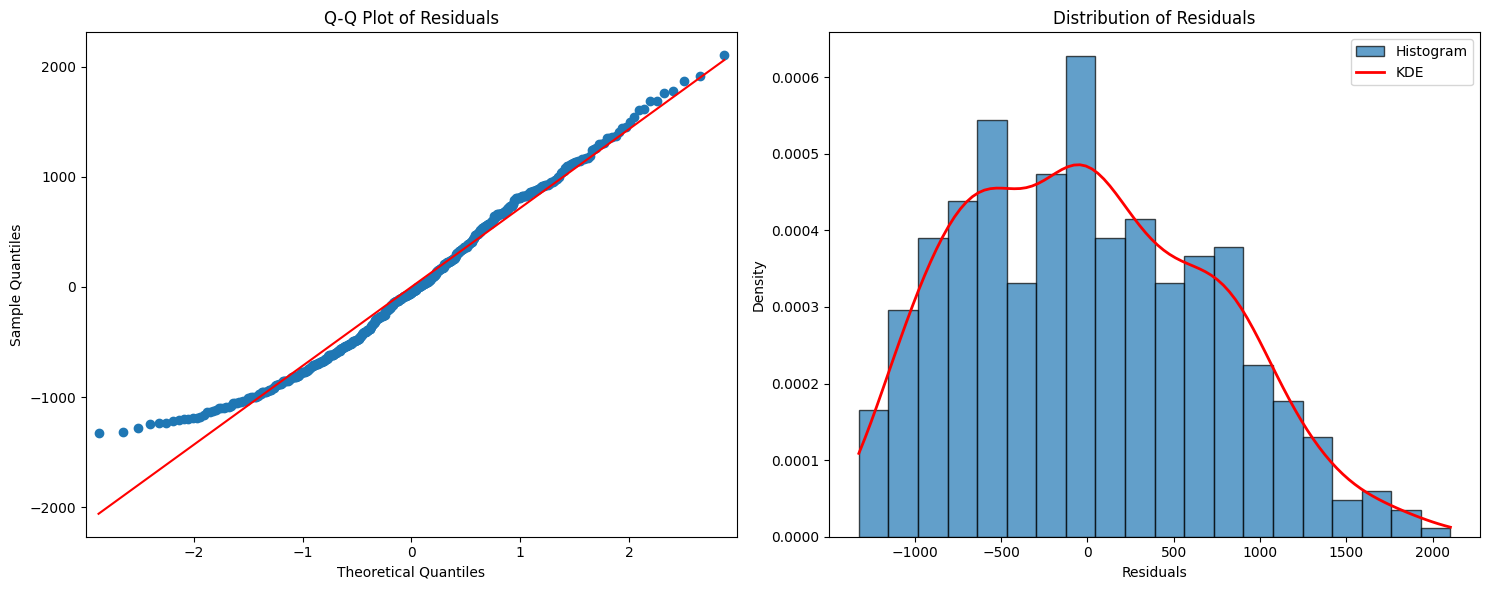


Shapiro-Wilk test for normality:
Statistic: 0.9794, p-value: 0.0000
⚠️  Residuals may not be normally distributed (p < 0.05)


In [31]:
dependent_var = 'S08'
independent_vars = [
    'SEX', 'AGE', 'BMI', 'MOCA', 'BARTHELINDEX', 
    'anzahl_Imp_baseline', 'anzahl_Inf_baseline', 'Nursing_Home',
    'Immunsuppression_binary_clean', 'krank_binary', '2022', '2023'
]

# Filter data to include only complete cases
regression_data = df[[dependent_var] + independent_vars].dropna()

print(f"Sample size for regression: {len(regression_data)}")
print(f"Variables included: {independent_vars}")

if len(regression_data) > len(independent_vars) + 1:  # Need more observations than variables
    

    y = regression_data[dependent_var]

    # Make sure predictors are numeric
    X = regression_data[independent_vars].apply(pd.to_numeric, errors='coerce')
    
    # Add constant term (intercept)
    X_with_const = sm.add_constant(X)
    X_with_const = X_with_const.astype(float)


    # ✅ Compute VIF
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_with_const.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_with_const.values, i)
        for i in range(X_with_const.shape[1])
    ]

    print("\n" + "="*60)
    print("VARIANCE INFLATION FACTORS (VIF)")
    print("="*60)
    print(vif_data)
    
    # Fit the regression model
    model = sm.OLS(y, X_with_const).fit()
    
    # Print comprehensive results
    print("\n" + "="*80)
    print("LINEAR REGRESSION RESULTS")
    print("="*80)
    print(model.summary())
    
    # Create detailed results table
    results_df = pd.DataFrame({
        'Variable': ['Intercept'] + independent_vars,
        'Coefficient': model.params.values,
        'Std_Error': model.bse.values,
        't_value': model.tvalues.values,
        'p_value': model.pvalues.values,
        'CI_Lower': model.conf_int()[0].values,
        'CI_Upper': model.conf_int()[1].values
    })
    
    # Calculate standardized coefficients (Beta coefficients)
    # Standardize X variables (not the constant)
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    y_standardized = (y - y.mean()) / y.std()
    
    # Fit model with standardized variables
    X_std_with_const = sm.add_constant(X_standardized)
    model_std = sm.OLS(y_standardized, X_std_with_const).fit()
    
    # Add standardized coefficients (skip intercept for standardized)
    results_df['Beta_Standardized'] = [np.nan] + list(model_std.params.values[1:])
    
    # Add significance indicators
    def significance_stars(p_val):
        if p_val < 0.001:
            return '***'
        elif p_val < 0.01:
            return '**'
        elif p_val < 0.05:
            return '*'
        elif p_val < 0.1:
            return '.'
        else:
            return ''
    
    results_df['Significance'] = results_df['p_value'].apply(significance_stars)
    
    # Display detailed results table
    print("\n" + "="*120)
    print("DETAILED REGRESSION COEFFICIENTS TABLE")
    print("="*120)
    
    # Format the table nicely
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(results_df.round(4))
    
    print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")
    
    # Model diagnostics
    print("\n" + "="*60)
    print("MODEL DIAGNOSTICS")
    print("="*60)
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"F-statistic p-value: {model.f_pvalue:.4e}")
    print(f"AIC: {model.aic:.2f}")
    print(f"BIC: {model.bic:.2f}")
    print(f"Log-Likelihood: {model.llf:.2f}")
    print(f"Durbin-Watson: {sm.stats.durbin_watson(model.resid):.4f}")
    
    # Residual analysis
    print("\n" + "="*60)
    print("RESIDUAL ANALYSIS")
    print("="*60)
    
    residuals = model.resid
    fitted_values = model.fittedvalues
    
    # Create residual plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Q-Q plot
    sm.qqplot(residuals, line='s', ax=axes[0])
    axes[0].set_title('Q-Q Plot of Residuals')
    
    # Histogram of residuals with KDE
    axes[1].hist(residuals, bins=20, alpha=0.7, edgecolor='black', density=True, label='Histogram')
    
    # Add KDE
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(residuals)
    x_range = np.linspace(residuals.min(), residuals.max(), 100)
    axes[1].plot(x_range, kde(x_range), 'red', linewidth=2, label='KDE')
    
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Distribution of Residuals')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Test for normality of residuals
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f"\nShapiro-Wilk test for normality:")
    print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
    
    if shapiro_p < 0.05:
        print("⚠️  Residuals may not be normally distributed (p < 0.05)")
    else:
        print("✓ Residuals appear normally distributed (p >= 0.05)")
else:
    print("❌ Not enough data points for regression analysis")
    print(f"Need at least {len(independent_vars) + 2} observations, have {len(regression_data)}")
